In [1]:
import pandas as pd
import numpy as np
import string
import pickle
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
data_path = './data/twitter_MBTI.csv'


data = pd.read_csv(data_path,sep=",")

<Axes: >

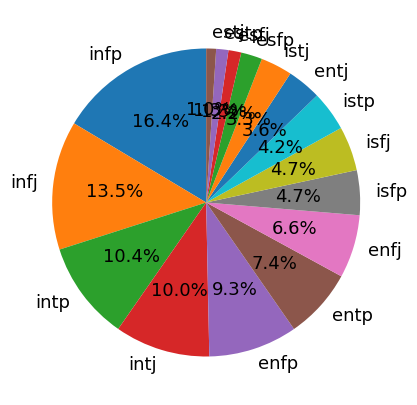

In [3]:
kwargs = dict(
    startangle = 90,
    fontsize   = 13,
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    label      = ''
)

data['label'].value_counts().plot.pie(**kwargs)

# Preprocessing

In [4]:
import pandas as pd
import numpy as np
import string
import pickle
import nltk
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

nltk_stopwords = set(stopwords.words('english'))
nltk_stopwords.remove('no')
nltk_stopwords.remove('not')

[nltk_data] Downloading package punkt to /storage/hhbao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /storage/hhbao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /storage/hhbao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /storage/hhbao/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /storage/hhbao/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
punctuation_translator = str.maketrans('', '', string.punctuation)

In [7]:
def preprocess_text(s, lowercase=True, remove_stopwords=True, remove_punctuation=True, stemmer=None, lemmatizer=None):
    tokens = word_tokenize(s)

    if lemmatizer is not None:
        tokens = lemmatize_tokens(lemmatizer, tokens)
    elif stemmer is not None:
        tokens = stem_tokens(stemmer, tokens)

    if lowercase:
        tokens = [token.lower() for token in tokens]
    
    if remove_stopwords:
        tokens = [token for token in tokens if not token in nltk_stopwords]
    
    # Remove all punctuation marks if needed (note: also converts, e.g, "Mr." to "Mr")
    if remove_punctuation:
        tokens = [ ''.join(c for c in s if c not in string.punctuation) for s in tokens ]
        tokens = [ token for token in tokens if len(token) > 0 ] # Remove "empty" tokens

    # if (len(tokens) == 0):
    #     print('len = 0: '+ s)

    return ' '.join(tokens)

def remove_punctuation(s):
    return s.translate(punctuation_translator)

def lemmatize_tokens(lemmatizer, tokens):
    pos_tag_list = pos_tag(tokens)
    for idx, (token, tag) in enumerate(pos_tag_list):
        tag_simple = tag[0].lower() # Converts, e.g., "VBD" to "c"
        if tag_simple in ['n', 'v', 'j']:
            word_type = tag_simple.replace('j', 'a') 
        else:
            word_type = 'n'
        lemmatized_token = lemmatizer.lemmatize(token, pos=word_type)
        tokens[idx] = lemmatized_token
    return tokens

def stem_tokens(stemmer, tokens):
    for idx, token in enumerate(tokens):
        tokens[idx] = stemmer.stem(token)
    return tokens

In [8]:
# train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
train_data, test_and_valid_data = train_test_split(data, test_size=0.2, random_state=42)
valid_data, test_data = train_test_split(test_and_valid_data, test_size=0.5, random_state=42)
vectorizer = TfidfVectorizer(lowercase=False)

content = train_data.iloc[:,1]
content = [ preprocess_text(x, remove_stopwords=True, remove_punctuation=True, lemmatizer=wordnet_lemmatizer) for x in content ]

X = vectorizer.fit_transform(content)
Y = train_data.iloc[:,2]

Y_test = test_data.iloc[:,2]
X_test_content = test_data.iloc[:,1]
X_test_content = [ preprocess_text(x, remove_stopwords=True, remove_punctuation=True, lemmatizer=wordnet_lemmatizer) for x in X_test_content ]

X_test = vectorizer.transform(X_test_content)


# ML Models (LR + Naive Bayes + Decision Tree)

In [9]:
lr_classifier = LogisticRegression(multi_class = 'multinomial',solver='newton-cg',max_iter = 1000).fit(X, Y)


In [10]:
Y_lr_predict = lr_classifier.predict(X_test)
print(classification_report(Y_test, Y_lr_predict, digits=4))

              precision    recall  f1-score   support

        enfj     1.0000    0.0926    0.1695        54
        enfp     0.5294    0.1324    0.2118        68
        entj     0.0000    0.0000    0.0000        33
        entp     0.6842    0.1857    0.2921        70
        esfj     0.0000    0.0000    0.0000        13
        esfp     0.0000    0.0000    0.0000        15
        estj     0.0000    0.0000    0.0000         5
        estp     0.0000    0.0000    0.0000         7
        infj     0.2899    0.6449    0.4000       107
        infp     0.2212    0.7121    0.3375       132
        intj     0.2745    0.1867    0.2222        75
        intp     0.5200    0.1625    0.2476        80
        isfj     0.0000    0.0000    0.0000        38
        isfp     0.0000    0.0000    0.0000        43
        istj     0.0000    0.0000    0.0000        16
        istp     0.0000    0.0000    0.0000        26

    accuracy                         0.2775       782
   macro avg     0.2200   

/storage_fast/hhbao/anaconda/envs/llama/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/storage_fast/hhbao/anaconda/envs/llama/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/storage_fast/hhbao/anaconda/envs/llama/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [11]:
mnb_classifier = MultinomialNB().fit(X, Y)

In [12]:
# Multinomial Naive Bayes 
Y_predict = mnb_classifier.predict(X_test)
print(classification_report(Y_test, Y_predict, digits=4))

              precision    recall  f1-score   support

        enfj     0.0000    0.0000    0.0000        54
        enfp     0.0000    0.0000    0.0000        68
        entj     0.0000    0.0000    0.0000        33
        entp     0.0000    0.0000    0.0000        70
        esfj     0.0000    0.0000    0.0000        13
        esfp     0.0000    0.0000    0.0000        15
        estj     0.0000    0.0000    0.0000         5
        estp     0.0000    0.0000    0.0000         7
        infj     0.3750    0.0841    0.1374       107
        infp     0.1728    0.9924    0.2944       132
        intj     0.0000    0.0000    0.0000        75
        intp     0.0000    0.0000    0.0000        80
        isfj     0.0000    0.0000    0.0000        38
        isfp     0.0000    0.0000    0.0000        43
        istj     0.0000    0.0000    0.0000        16
        istp     0.0000    0.0000    0.0000        26

    accuracy                         0.1790       782
   macro avg     0.0342   

/storage_fast/hhbao/anaconda/envs/llama/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/storage_fast/hhbao/anaconda/envs/llama/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/storage_fast/hhbao/anaconda/envs/llama/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [13]:
# Decision Tree
tree_classifier = tree.DecisionTreeClassifier().fit(X, Y)
Y_tree_predict = tree_classifier.predict(X_test)
print(classification_report(Y_test, Y_tree_predict, digits=4))

              precision    recall  f1-score   support

        enfj     0.4510    0.4259    0.4381        54
        enfp     0.3171    0.3824    0.3467        68
        entj     0.2632    0.1515    0.1923        33
        entp     0.5294    0.3857    0.4463        70
        esfj     0.3333    0.1538    0.2105        13
        esfp     0.2353    0.2667    0.2500        15
        estj     0.4000    0.4000    0.4000         5
        estp     0.3750    0.4286    0.4000         7
        infj     0.4495    0.4579    0.4537       107
        infp     0.4362    0.4924    0.4626       132
        intj     0.4375    0.4667    0.4516        75
        intp     0.4875    0.4875    0.4875        80
        isfj     0.3750    0.3947    0.3846        38
        isfp     0.3784    0.3256    0.3500        43
        istj     0.1667    0.2500    0.2000        16
        istp     0.1667    0.1538    0.1600        26

    accuracy                         0.4054       782
   macro avg     0.3626   

# Bert

In [14]:
# Bert
import pandas as pd
import torch
import numpy as np
import transformers
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {
          'infp':0,
          'infj':1,
          'intp':2,
          'intj':3,
          'istp':4,
          'istj':5,
          'isfj':6,
          'isfp':7,
          'enfp':8,
          'entp':9,
          'enfj':10,
          'entj':11,
          'estp':12,
          'estj':13,
          'esfj':14,
          'esfp':15,
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['label']]
        # self.labels = [label for label in df['Label']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]
    # Get the labels
    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    # Get the batch's labels
    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

/storage_fast/hhbao/anaconda/envs/llama/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 16)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [16]:
def train(model, train_data, val_data, learning_rate, epochs):

    # Data Preparation
    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=32)

    # Cuda
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # Loss & Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} | Train Accuracy: {total_acc_train / len(train_data): .3f} | Val Loss: {total_loss_val / len(val_data): .3f} | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  

In [17]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)

            acc = (output.argmax(dim=1) == test_label).sum().item()
            total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')

In [18]:
EPOCHS = 10 
np.random.seed(42)
model = BertClassifier()
LR = 1e-6
              
train(model, train_data, valid_data, LR, EPOCHS)

100%|██████████| 196/196 [02:52<00:00,  1.14it/s]


Epochs: 1 | Train Loss:  0.087 | Train Accuracy:  0.106 | Val Loss:  0.087 | Val Accuracy:  0.119


100%|██████████| 196/196 [02:53<00:00,  1.13it/s]


Epochs: 2 | Train Loss:  0.084 | Train Accuracy:  0.161 | Val Loss:  0.085 | Val Accuracy:  0.146


100%|██████████| 196/196 [02:53<00:00,  1.13it/s]


Epochs: 3 | Train Loss:  0.082 | Train Accuracy:  0.161 | Val Loss:  0.084 | Val Accuracy:  0.179


100%|██████████| 196/196 [02:53<00:00,  1.13it/s]


Epochs: 4 | Train Loss:  0.081 | Train Accuracy:  0.169 | Val Loss:  0.084 | Val Accuracy:  0.147


100%|██████████| 196/196 [02:53<00:00,  1.13it/s]


Epochs: 5 | Train Loss:  0.080 | Train Accuracy:  0.171 | Val Loss:  0.083 | Val Accuracy:  0.151


100%|██████████| 196/196 [02:53<00:00,  1.13it/s]


Epochs: 6 | Train Loss:  0.080 | Train Accuracy:  0.178 | Val Loss:  0.083 | Val Accuracy:  0.156


100%|██████████| 196/196 [02:53<00:00,  1.13it/s]


Epochs: 7 | Train Loss:  0.079 | Train Accuracy:  0.186 | Val Loss:  0.082 | Val Accuracy:  0.175


100%|██████████| 196/196 [02:53<00:00,  1.13it/s]


Epochs: 8 | Train Loss:  0.079 | Train Accuracy:  0.200 | Val Loss:  0.083 | Val Accuracy:  0.157


100%|██████████| 196/196 [02:53<00:00,  1.13it/s]


Epochs: 9 | Train Loss:  0.078 | Train Accuracy:  0.207 | Val Loss:  0.082 | Val Accuracy:  0.146


100%|██████████| 196/196 [02:53<00:00,  1.13it/s]


Epochs: 10 | Train Loss:  0.078 | Train Accuracy:  0.219 | Val Loss:  0.083 | Val Accuracy:  0.164


In [19]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)

            acc = (output.argmax(dim=1) == test_label).sum().item()
            total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')

In [20]:
evaluate(model, test_data)


Test Accuracy:  0.174
